# **Accessing the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''import zipfile
import os

zip_path = '/content/drive/My Drive/Nisarga/Brain Tumor Benchmark Dataset.zip'
extract_path = '/content/drive/My Drive/Nisarga/Brain_Tumor/'

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)'''

"import zipfile\nimport os\n\nzip_path = '/content/drive/My Drive/Nisarga/Brain Tumor Benchmark Dataset.zip'\nextract_path = '/content/drive/My Drive/Nisarga/Brain_Tumor/'\n\nif not os.path.exists(extract_path):\n    os.makedirs(extract_path)\n\nwith zipfile.ZipFile(zip_path, 'r') as zip_ref:\n    zip_ref.extractall(extract_path)"

# **Dependencies**

In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Loading and Pre-Processing**

In [ ]:
def load_data(data_dir, img_size):
    data = []
    labels = []
    label_mapping = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
    for label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, label)
        for img in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (img_size, img_size))
            data.append(image)
            labels.append(label_mapping[label])
    return np.array(data), np.array(labels)

In [ ]:
train_data_dir = '/content/drive/My Drive/Nisarga/Brain_Tumor/Training'
test_data_dir = '/content/drive/My Drive/Nisarga/Brain_Tumor/Testing'
img_size = 224

In [ ]:
X_train, y_train = load_data(train_data_dir, img_size)
X_test, y_test = load_data(test_data_dir, img_size)

# **Normalizing the Pixel Values**

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Augmentation Pipeline**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
datagen.fit(X_train)

# **VGG19**

In [ ]:
from tensorflow.keras import layers, models, optimizers

def build_vgg19(input_shape):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    return model

# Build and compile the VGG19 model
input_shape = (img_size, img_size, 3)
vgg19_model = build_vgg19(input_shape)
vgg19_model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
VGG19 = vgg19_model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 104s 819ms/step - accuracy: 0.3331 - loss: 1.3421 - val_accuracy: 0.3791 - val_loss: 1.3297
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 590ms/step - accuracy: 0.5301 - loss: 1.0306 - val_accuracy: 0.5896 - val_loss: 0.9230
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 588ms/step - accuracy: 0.6281 - loss: 0.9102 - val_accuracy: 0.6423 - val_loss: 0.8809
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 588ms/step - accuracy: 0.7327 - loss: 0.6957 - val_accuracy: 0.6720 - val_loss: 0.7512
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.7616 - loss: 0.6111 - val_accuracy: 0.6255 - val_loss: 0.8548
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 591ms/step - accuracy: 0.7580 - loss: 0.6259 - val_accuracy: 0.7727 - val_loss: 0.6037
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 589ms/step - accuracy: 0.7980 - loss: 0.5137 - val_accuracy: 0.7811 - val_loss: 0.5829
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 589ms/step - accuracy: 0.8147 - loss: 0.4853 - val_accuracy: 0.79

In [ ]:
y_pred = vgg19_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step


In [ ]:
label_mapping = {'Glioma': 0, 'Meningioma': 1, 'No Tumor': 2, 'Pituitary': 3}
class_names = {v: k for k, v in label_mapping.items()}

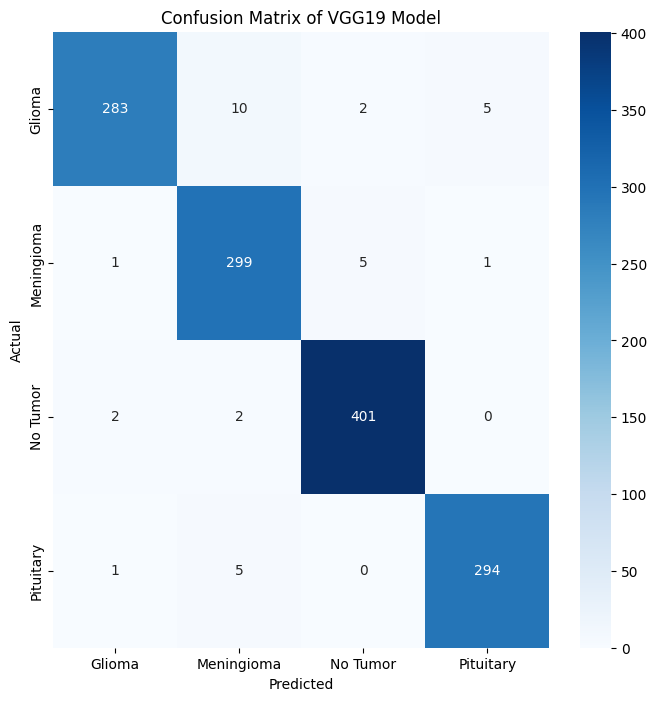

              precision    recall  f1-score   support

      Glioma       0.99      0.94      0.96       300
  Meningioma       0.95      0.98      0.96       306
    No Tumor       0.98      0.99      0.99       405
   Pituitary       0.98      0.98      0.98       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of VGG19 Model')
plt.show()
print(classification_report(y_test, y_pred_classes, target_names=list(class_names.values())))

# **VGG16**

In [ ]:
from tensorflow.keras import layers, models, optimizers

def build_vgg16(input_shape):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    return model

# Build and compile the VGG16 model
input_shape = (img_size, img_size, 3)
vgg16_model = build_vgg16(input_shape)
vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
VGG16 = vgg16_model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 69s 652ms/step - accuracy: 0.3480 - loss: 1.3085 - val_accuracy: 0.5149 - val_loss: 1.0918
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 586ms/step - accuracy: 0.5089 - loss: 1.0718 - val_accuracy: 0.4905 - val_loss: 1.3428
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 592ms/step - accuracy: 0.6163 - loss: 0.9152 - val_accuracy: 0.6514 - val_loss: 0.8737
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.7203 - loss: 0.7068 - val_accuracy: 0.7277 - val_loss: 0.6673
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 585ms/step - accuracy: 0.7559 - loss: 0.6233 - val_accuracy: 0.6705 - val_loss: 0.8381
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.7561 - loss: 0.6237 - val_accuracy: 0.7460 - val_loss: 0.6476
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 583ms/step - accuracy: 0.7742 - loss: 0.5810 - val_accuracy: 0.7513 - val_loss: 0.6238
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 585ms/step - accuracy: 0.7883 - loss: 0.5349 - val_accuracy: 0.829

In [ ]:
y_pred = vgg16_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step


In [ ]:
label_mapping = {'Glioma': 0, 'Meningioma': 1, 'No Tumor': 2, 'Pituitary': 3}
class_names = {v: k for k, v in label_mapping.items()}

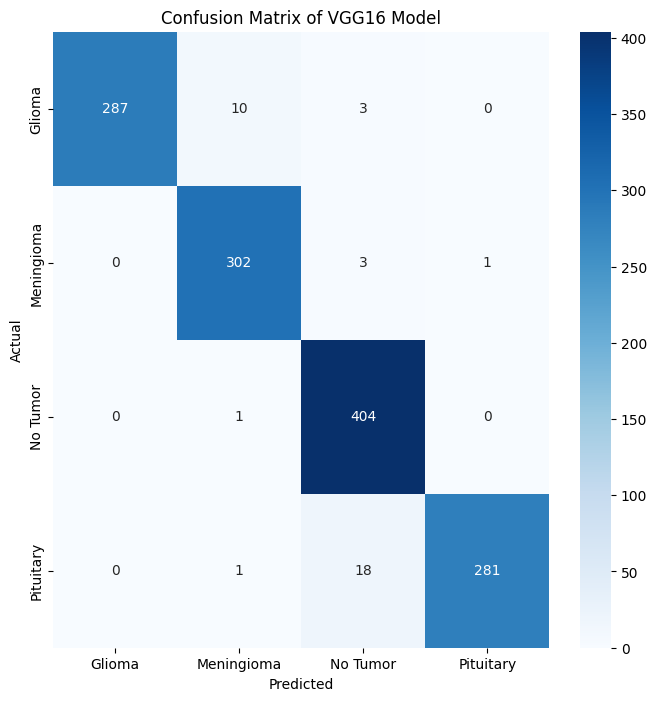

              precision    recall  f1-score   support

      Glioma       1.00      0.96      0.98       300
  Meningioma       0.96      0.99      0.97       306
    No Tumor       0.94      1.00      0.97       405
   Pituitary       1.00      0.94      0.97       300

    accuracy                           0.97      1311
   macro avg       0.98      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of VGG16 Model')
plt.show()
print(classification_report(y_test, y_pred_classes, target_names=list(class_names.values())))

# **GoogleNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# Inception Module

def inception_module(x, filters):
    # 1x1 conv
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 3x3 conv
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)

    # 5x5 conv
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)

    # 3x3 max pooling
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)

    return layers.concatenate([path1, path2, path3, path4], axis=-1)

In [ ]:
def googlenet(input_shape):
    inputs = Input(shape=input_shape)

    # First convolutional layer with 7x7 filters
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Second convolutional layer with 1x1 filter, followed by 3x3 filter
    x = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception module 1
    x = inception_module(x, [64, 96, 128, 16, 32, 32])

    # Inception module 2
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception module 3
    x = inception_module(x, [192, 96, 208, 16, 48, 64])

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Dropout layer
    x = layers.Dropout(0.5)(x)

    # Output layer
    outputs = layers.Dense(4, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

In [ ]:
# Build and compile the GoogleNet model
input_shape = (img_size, img_size, 3)
googlenet_model = googlenet(input_shape)
googlenet_model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Inception = googlenet_model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 86s 735ms/step - accuracy: 0.2810 - loss: 1.3543 - val_accuracy: 0.4676 - val_loss: 1.1676
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 573ms/step - accuracy: 0.5080 - loss: 1.0729 - val_accuracy: 0.5912 - val_loss: 1.0582
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 574ms/step - accuracy: 0.5790 - loss: 0.9662 - val_accuracy: 0.6125 - val_loss: 1.0089
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 575ms/step - accuracy: 0.6279 - loss: 0.8975 - val_accuracy: 0.6224 - val_loss: 1.0348
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 574ms/step - accuracy: 0.6382 - loss: 0.8623 - val_accuracy: 0.6407 - val_loss: 0.8932
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 573ms/step - accuracy: 0.6461 - loss: 0.8389 - val_accuracy: 0.6644 - val_loss: 0.8841
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 574ms/step - accuracy: 0.6728 - loss: 0.8032 - val_accuracy: 0.6659 - val_loss: 0.9425
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 572ms/step - accuracy: 0.6792 - loss: 0.7834 - val_accuracy: 0.656

In [ ]:
y_pred = googlenet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step


In [ ]:
label_mapping = {'Glioma': 0, 'Meningioma': 1, 'No Tumor': 2, 'Pituitary': 3}
class_names = {v: k for k, v in label_mapping.items()}

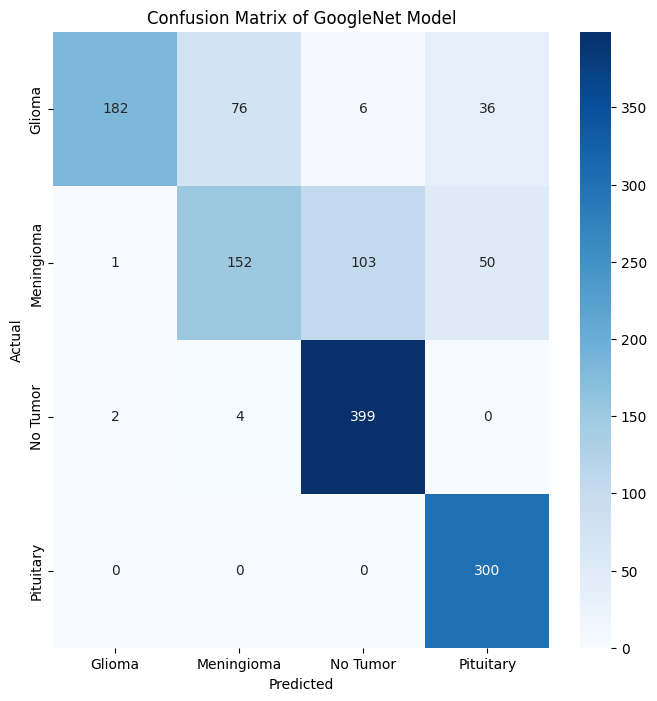

              precision    recall  f1-score   support

      Glioma       0.98      0.61      0.75       300
  Meningioma       0.66      0.50      0.57       306
    No Tumor       0.79      0.99      0.87       405
   Pituitary       0.78      1.00      0.87       300

    accuracy                           0.79      1311
   macro avg       0.80      0.77      0.77      1311
weighted avg       0.80      0.79      0.77      1311



In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of GoogleNet Model')
plt.show()
print(classification_report(y_test, y_pred_classes, target_names=list(class_names.values())))

# **ResNet50**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

def identity_block(x, filters, kernel_size):
    f1, f2, f3 = filters

    x_shortcut = x

    x = layers.Conv2D(f1, (1, 1), strides=(1, 1), padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f2, kernel_size, strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f3, (1, 1), strides=(1, 1), padding='valid')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, x_shortcut])
    x = layers.ReLU()(x)

    return x

In [ ]:
def convolutional_block(x, filters, kernel_size, strides=(2, 2)):
    f1, f2, f3 = filters

    x_shortcut = x

    x = layers.Conv2D(f1, (1, 1), strides=strides, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f2, kernel_size, strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f3, (1, 1), strides=(1, 1), padding='valid')(x)
    x = layers.BatchNormalization()(x)

    x_shortcut = layers.Conv2D(f3, (1, 1), strides=strides, padding='valid')(x_shortcut)
    x_shortcut = layers.BatchNormalization()(x_shortcut)

    x = layers.Add()([x, x_shortcut])
    x = layers.ReLU()(x)

    return x

In [ ]:
def resnet50(input_shape):
    inputs = Input(shape=input_shape)

    x = layers.ZeroPadding2D((3, 3))(inputs)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = convolutional_block(x, filters=[64, 64, 256], kernel_size=(3, 3), strides=(1, 1))
    x = identity_block(x, filters=[64, 64, 256], kernel_size=(3, 3))
    x = identity_block(x, filters=[64, 64, 256], kernel_size=(3, 3))

    x = convolutional_block(x, filters=[128, 128, 512], kernel_size=(3, 3), strides=(2, 2))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=(3, 3))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=(3, 3))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=(3, 3))

    x = convolutional_block(x, filters=[256, 256, 1024], kernel_size=(3, 3), strides=(2, 2))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))

    x = convolutional_block(x, filters=[512, 512, 2048], kernel_size=(3, 3), strides=(2, 2))
    x = identity_block(x, filters=[512, 512, 2048], kernel_size=(3, 3))
    x = identity_block(x, filters=[512, 512, 2048], kernel_size=(3, 3))

    x = layers.AveragePooling2D((2, 2), padding='same')(x)

    x = layers.Flatten()(x)
    x = layers.Dense(4, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

In [ ]:
input_shape = (img_size, img_size, 3)
resnet_model = resnet50(input_shape)
resnet_model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ResNet50_Hist = resnet_model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 141s 917ms/step - accuracy: 0.4899 - loss: 1.6221 - val_accuracy: 0.2288 - val_loss: 1.5867
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 583ms/step - accuracy: 0.6188 - loss: 1.0168 - val_accuracy: 0.2288 - val_loss: 1.5849
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 579ms/step - accuracy: 0.6792 - loss: 0.8761 - val_accuracy: 0.2792 - val_loss: 1.9779
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 582ms/step - accuracy: 0.6935 - loss: 0.7965 - val_accuracy: 0.4401 - val_loss: 1.4093
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.7566 - loss: 0.6462 - val_accuracy: 0.4188 - val_loss: 1.5508
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 581ms/step - accuracy: 0.7811 - loss: 0.5553 - val_accuracy: 0.4394 - val_loss: 1.8059
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 581ms/step - accuracy: 0.7972 - loss: 0.5409 - val_accuracy: 0.5629 - val_loss: 1.8584
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 582ms/step - accuracy: 0.8113 - loss: 0.5166 - val_accuracy: 0.46

In [ ]:
y_pred = resnet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step


In [ ]:
label_mapping = {'Glioma': 0, 'Meningioma': 1, 'No Tumor': 2, 'Pituitary': 3}
class_names = {v: k for k, v in label_mapping.items()}

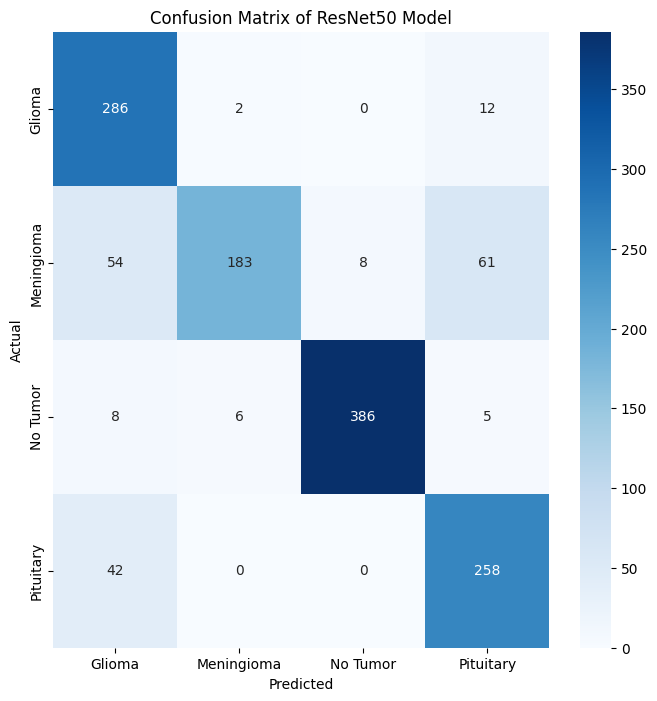

              precision    recall  f1-score   support

      Glioma       0.73      0.95      0.83       300
  Meningioma       0.96      0.60      0.74       306
    No Tumor       0.98      0.95      0.97       405
   Pituitary       0.77      0.86      0.81       300

    accuracy                           0.85      1311
   macro avg       0.86      0.84      0.84      1311
weighted avg       0.87      0.85      0.85      1311



In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of ResNet50 Model')
plt.show()
print(classification_report(y_test, y_pred_classes, target_names=list(class_names.values())))

# **DenseNet121**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        x = conv_block(x, growth_rate)
    return x

def conv_block(x, growth_rate):
    x1 = layers.BatchNormalization()(x)
    x1 = layers.ReLU()(x1)
    x1 = layers.Conv2D(4 * growth_rate, (1, 1), padding='same', use_bias=False)(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.ReLU()(x1)
    x1 = layers.Conv2D(growth_rate, (3, 3), padding='same', use_bias=False)(x1)
    x = layers.Concatenate()([x, x1])
    return x

def transition_block(x, reduction):
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(int(tf.keras.backend.int_shape(x)[-1] * reduction), (1, 1), padding='same', use_bias=False)(x)
    x = layers.AvgPool2D((2, 2), strides=(2, 2))(x)
    return x

In [ ]:
def DenseNet121(input_shape):
    inputs = Input(shape=input_shape)

    # Initial Convolution and Pooling
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Dense Block 1
    x = dense_block(x, 6, 32)
    x = transition_block(x, 0.5)

    # Dense Block 2
    x = dense_block(x, 12, 32)
    x = transition_block(x, 0.5)

    # Dense Block 3
    x = dense_block(x, 24, 32)
    x = transition_block(x, 0.5)

    # Dense Block 4
    x = dense_block(x, 16, 32)

    # Classification Layer
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.GlobalAvgPool2D()(x)
    x = layers.Dense(4, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

In [ ]:
input_shape = (img_size, img_size, 3)
densenet_model = DenseNet121(input_shape)
densenet_model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
DenseNet121_Hist = densenet_model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.6435 - loss: 0.8653 - val_accuracy: 0.2288 - val_loss: 2.8672
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 585ms/step - accuracy: 0.8324 - loss: 0.4690 - val_accuracy: 0.2288 - val_loss: 4.5379
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.8747 - loss: 0.3336 - val_accuracy: 0.2296 - val_loss: 12.5759
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 588ms/step - accuracy: 0.9007 - loss: 0.2679 - val_accuracy: 0.3089 - val_loss: 5.6315
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.9218 - loss: 0.2218 - val_accuracy: 0.3013 - val_loss: 6.8611
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 586ms/step - accuracy: 0.8866 - loss: 0.3184 - val_accuracy: 0.2921 - val_loss: 4.7597
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 586ms/step - accuracy: 0.9332 - loss: 0.2018 - val_accuracy: 0.6697 - val_loss: 0.9317
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 60s 621ms/step - accuracy: 0.9405 - loss: 0.1765 - val_accuracy: 0.9001

In [ ]:
y_pred = densenet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step


In [ ]:
label_mapping = {'Glioma': 0, 'Meningioma': 1, 'No Tumor': 2, 'Pituitary': 3}
class_names = {v: k for k, v in label_mapping.items()}

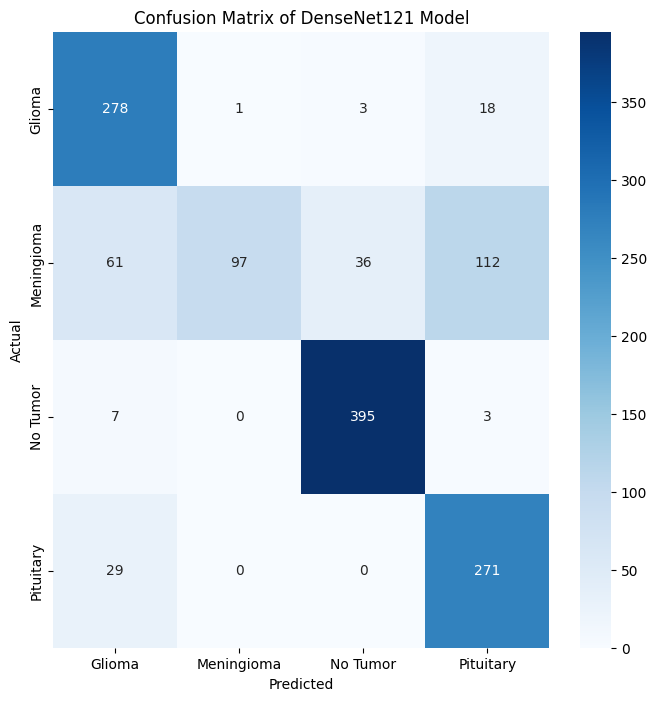

              precision    recall  f1-score   support

      Glioma       0.74      0.93      0.82       300
  Meningioma       0.99      0.32      0.48       306
    No Tumor       0.91      0.98      0.94       405
   Pituitary       0.67      0.90      0.77       300

    accuracy                           0.79      1311
   macro avg       0.83      0.78      0.75      1311
weighted avg       0.84      0.79      0.77      1311



In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of DenseNet121 Model')
plt.show()
print(classification_report(y_test, y_pred_classes, target_names=list(class_names.values())))

# **Curves**

Text(0.5, 1.0, 'Training Accuracy')

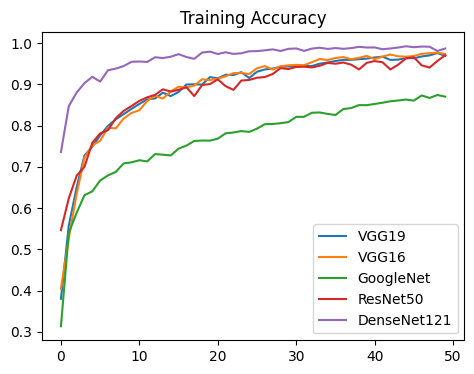

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(VGG19.history['accuracy'], label='VGG19')
plt.plot(VGG16.history['accuracy'], label='VGG16')
plt.plot(Inception.history['accuracy'], label='GoogleNet')
plt.plot(ResNet50_Hist.history['accuracy'], label='ResNet50')
plt.plot(DenseNet121_Hist.history['accuracy'], label='DenseNet121')
plt.legend()
plt.title('Training Accuracy')

Text(0.5, 1.0, 'Validation Accuracy')

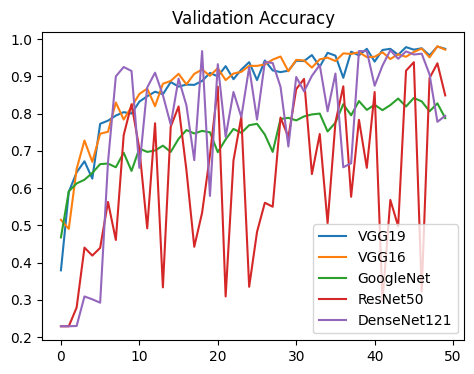

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(VGG19.history['val_accuracy'], label='VGG19')
plt.plot(VGG16.history['val_accuracy'], label='VGG16')
plt.plot(Inception.history['val_accuracy'], label='GoogleNet')
plt.plot(ResNet50_Hist.history['val_accuracy'], label='ResNet50')
plt.plot(DenseNet121_Hist.history['val_accuracy'], label='DenseNet121')
plt.legend()
plt.title('Validation Accuracy')

Text(0.5, 1.0, 'Training Loss')

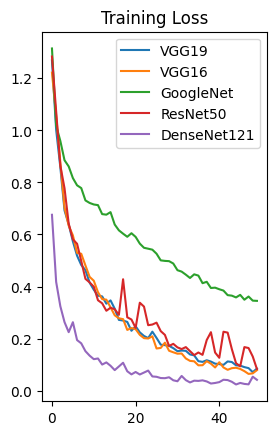

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(VGG19.history['loss'], label='VGG19')
plt.plot(VGG16.history['loss'], label='VGG16')
plt.plot(Inception.history['loss'], label='GoogleNet')
plt.plot(ResNet50_Hist.history['loss'], label='ResNet50')
plt.plot(DenseNet121_Hist.history['loss'], label='DenseNet121')
plt.legend()
plt.title('Training Loss')

Text(0.5, 1.0, 'Validation Loss')

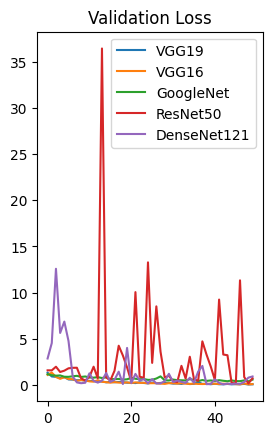

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(VGG19.history['val_loss'], label='VGG19')
plt.plot(VGG16.history['val_loss'], label='VGG16')
plt.plot(Inception.history['val_loss'], label='GoogleNet')
plt.plot(ResNet50_Hist.history['val_loss'], label='ResNet50')
plt.plot(DenseNet121_Hist.history['val_loss'], label='DenseNet121')
plt.legend()
plt.title('Validation Loss')